## Anomaly Detection

Liczba przykładów: 307
Liczba cech: 2


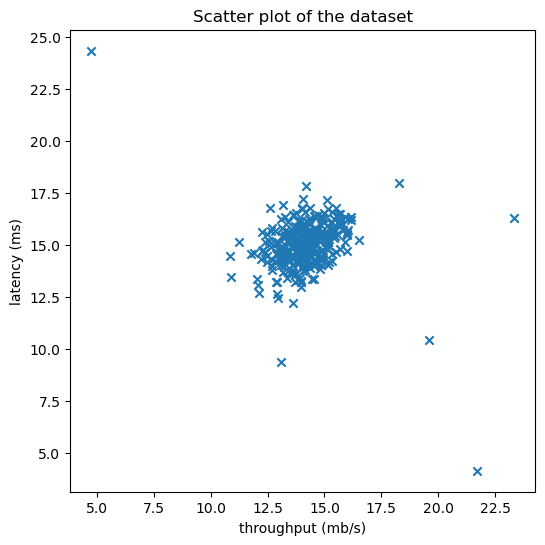

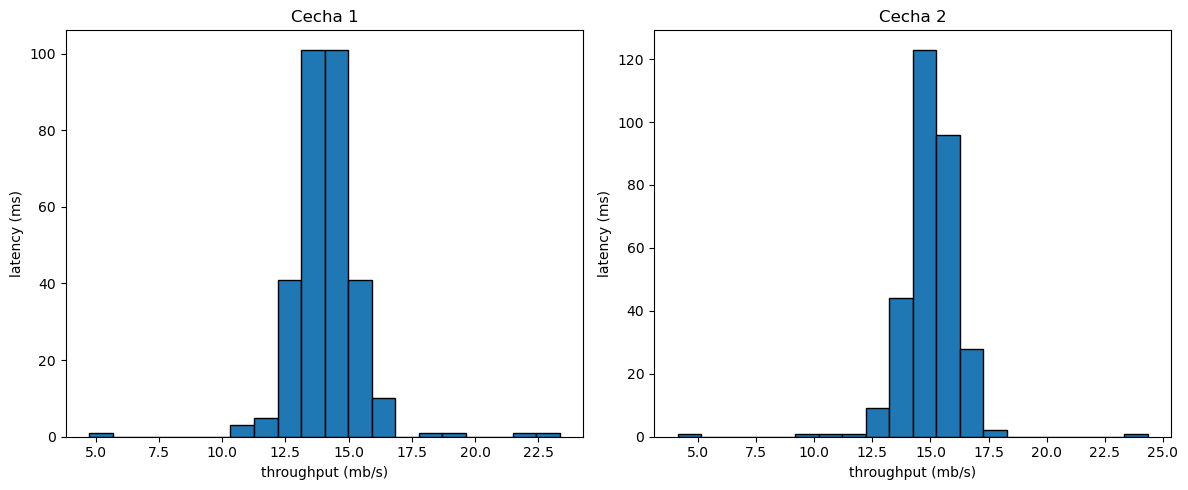

In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
# TODO: amount of data

data = loadmat('ex8data1.mat')
X = data['X']

print(f"Liczba przykładów: {X.shape[0]}")
print(f"Liczba cech: {X.shape[1]}")

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker='x')
plt.xlabel("throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.title("Scatter plot of the dataset")
plt.show()

plt.figure(figsize=(12, 5))

for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i+1)
    plt.hist(X[:, i], bins=20, edgecolor='black')
    plt.title(f'Cecha {i+1}')
    plt.xlabel("throughput (mb/s)")
    plt.ylabel("latency (ms)")

plt.tight_layout()
plt.show()


In [6]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return mu, sigma

mu, sigma = estimate_gaussian(X)
print("Średnia:", mu)
print("Odchylenie standardowe:", sigma)

Średnia: [14.11222578 14.99771051]
Odchylenie standardowe: [1.35374717 1.3075723 ]


Rozmiar zbioru walidacyjnego: (307, 2)
Liczba próbek klasy 1 (anomalie): 9


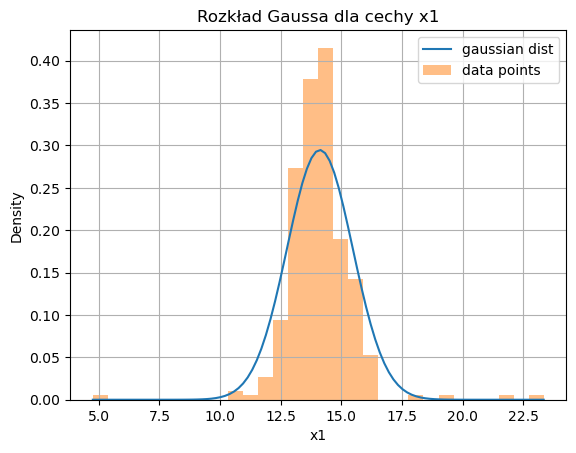

In [9]:
Xval = data['Xval']
yval = data['yval']

print("Rozmiar zbioru walidacyjnego:", Xval.shape)
print("Liczba próbek klasy 1 (anomalie):", np.sum(yval == 1))

from scipy.stats import norm

# Oblicz wartości funkcji gęstości prawdopodobieństwa
p_val = norm.pdf(Xval, loc=mu, scale=sigma)

# Można połączyć kolumnowo (jeśli chcesz pojedynczą wartość na próbkę)
p_val_joint = np.prod(p_val, axis=1)  # zakładamy niezależność cech

x = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
gauss = norm.pdf(x, loc=mu[0], scale=sigma[0])

plt.figure()
plt.plot(x, gauss, label='gaussian dist')
plt.hist(X[:, 0], bins=30, density=True, alpha=0.5, label='data points')
plt.xlabel('x1')
plt.ylabel('Density')
plt.legend()
plt.title('Rozkład Gaussa dla cechy x1')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0

    epsilons = np.linspace(pval.min(), pval.max(), 1000)
    for eps in epsilons:
        predictions = (pval < eps).astype(int)
        score = f1_score(yval, predictions)
        if score > best_f1:
            best_f1 = score
            best_epsilon = eps
    return best_epsilon, best_f1

epsilon, best_f1 = select_threshold(p_val_joint, yval.ravel())
print("Wybrany próg (epsilon):", epsilon)
print("Najlepszy F1 score:", best_f1)


Wybrany próg (epsilon): 8.999852631901394e-05
Najlepszy F1 score: 0.875


In [ ]:
p_X = norm.pdf(X, loc=mu, scale=sigma)
p_X_joint = np.prod(p_X, axis=1)

anomalies = X[p_X_joint < epsilon]


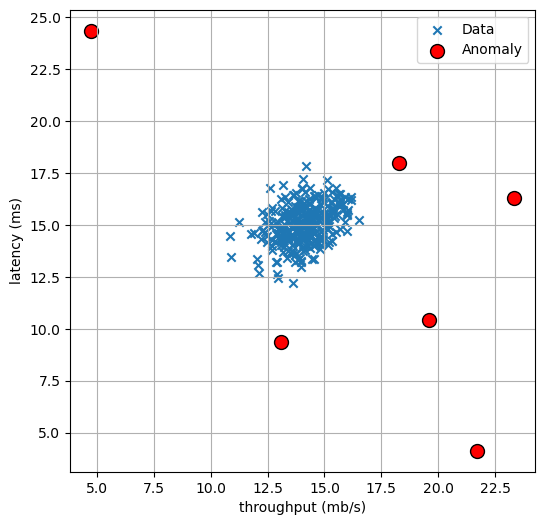

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], marker='x', label='Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', edgecolor='k', s=100, label='Anomaly')
plt.xlabel("throughput (mb/s)")
plt.ylabel("latency (ms)")
plt.legend()
plt.grid(True)
plt.show()
